(Other_Activation_Functions)=
# Chapter 16 -- Other Activation Functions


The other solution for the vanishing gradient is to use other activation functions. We like the old activation function sigmoid $\sigma(h)$ because first, it returns $0.5$ when $h=0$ (i.e. $\sigma(0)$) and second, it gives a higher probability when the input value is positive and vice versa. This makes it the perfect activation function for predicting the probability. However, the vanishing gradient is a major problem we cannot ignore. In DNN (Deep Neural Network), fortunately, we can use the sigmoid function for only the output layer, and use other activation functions for hidden layers. Here are some alternatives for the activation function that do not share the same vanishing gradient problem.

\begin{equation}
tanh(x)=\frac{e^h-e^{-h}}{e^h+e^{-h}}
\end{equation}
where $h=w*x+b$.

In [4]:
# make the figure be plotted at the centre
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

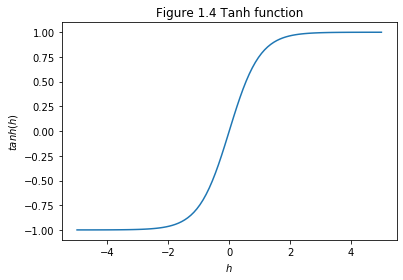

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N  = 100

def main():
    h = np.linspace(-5, 5, N)
    tanh = (np.exp(h)-np.exp(-h))/(np.exp(h)+np.exp(-h))

    plt.figure()
    plt.plot(h, tanh)
    plt.xlabel('$h$')
    plt.ylabel('$tanh(h)$')
    plt.title('Figure 1.4 Tanh function')
    
    plt.show()

if __name__ == '__main__':
    main()

$tanh(x)$ is centred at $0$, which means the probability would be negative if the input value is negative and vice versa. The possibility of having a negative value allows the weight to update better than sigmoid. For sigmoid function that only produces positive values, all weights to the same neuron must either increase together or decrease together. That's a problem, since some of the weights may need to increase while others need to decrease. That can only happen if some of the input activations have different signs. That suggests replacing the sigmoid by an activation function, such as tanh, which allows both positive and negative activations. Of course, the tanh has slightly steeper gradient than the sigmoid but it still faces the vanishing gradient problem.


\begin{equation}
ReLU(h)=max(0,h)
\end{equation}

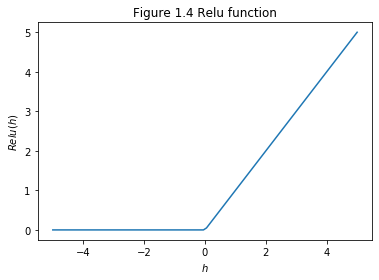

In [6]:
#ReLu function
def relu(X):
    return np.maximum(0,X)

N  = 100

def main():
    h = np.linspace(-5, 5, N)
    Relu = relu(h)

    plt.figure()
    plt.plot(h, Relu)
    plt.xlabel('$h$')
    plt.ylabel('$Relu(h)$')
    plt.title('Figure 1.4 Relu function')
    
    plt.show()

if __name__ == '__main__':
    main()

This activation function is wildly used in CNN (Convolutional Neural Network) because of the two characters: it is easy to compute and it does not have a vanishing gradient problem at all. Nevertheless, it has the biggest problem, which is there is no derivative at the point ($x=0$). We can avoid this by keep our learning rate low. On the other hand, when the weighted input to a rectified linear unit is negative, the gradient vanishes, and so the neuron stops learning entirely. Some recent work on image recognition has found considerable benefit in using rectified linear units through much of the network. However, as with tanh neurons, we do not yet have a really deep understanding of when, exactly, rectified linear units are preferable, nor why.

The following figure 1.31 is a MLP/DNN model with modified activation functions. In this model, the activation functions are changed to ReLU from sigmoid for all hidden layers but the output layer (in order to predict the probability).

<img src="images/ReLUDNN.PNG" width="500">
<center> Figure 1.31